<a href="https://colab.research.google.com/github/ayoub4145/Cost-Medical-predictions/blob/main/Cost_Medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/insurance.csv')
X=df[['age','sex','bmi','children','smoker','region']]
y=df['charges']
df.head()
df.columns
#Pas de valeurs manquantes
df.isnull().sum()
X.head()
df.info()
print(df.describe())  # Voir min, max, moyenne des valeurs cibles



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max     

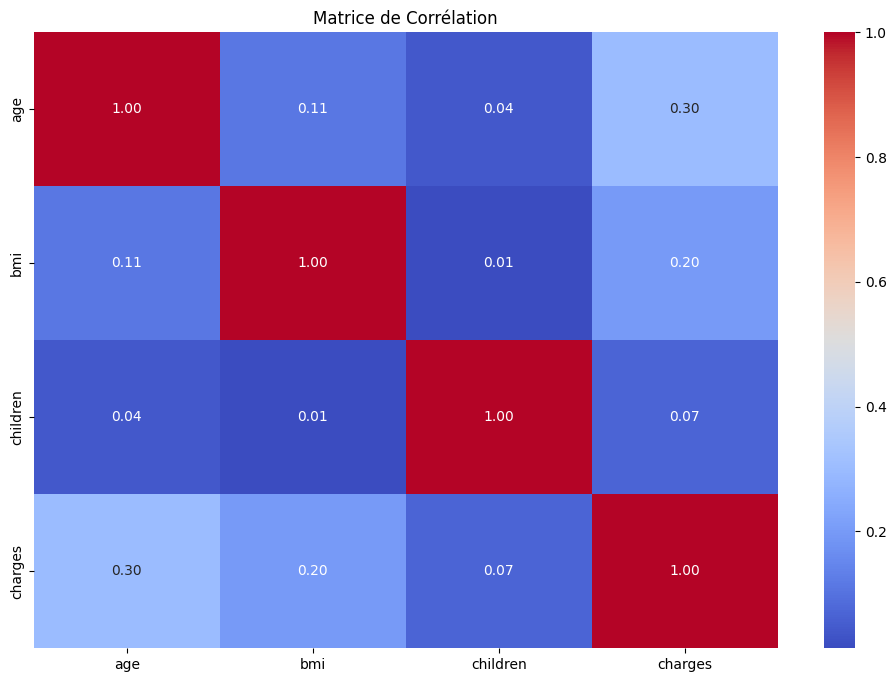

In [ ]:
import seaborn as sns
# Visualisation de la corrélation entre les variables
correlation_matrix = df.select_dtypes(include=np.number).corr() # Select only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

In [ ]:
df.shape

(1338, 7)

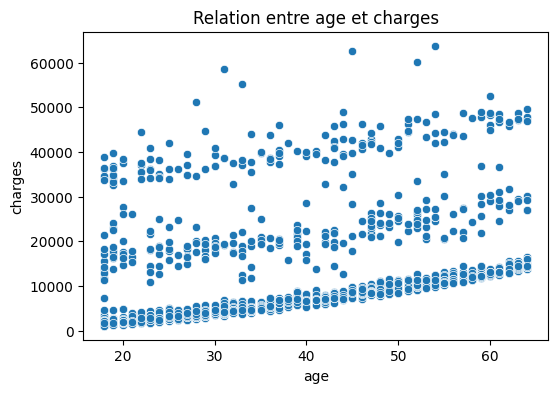

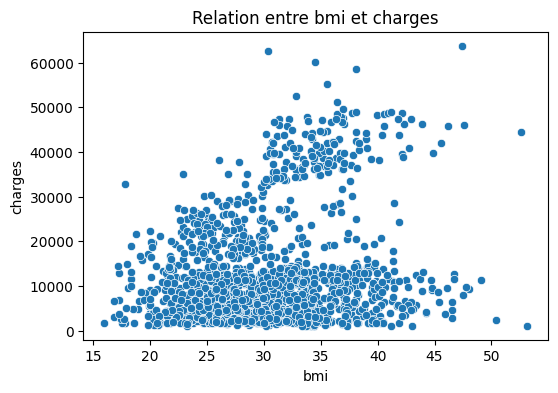

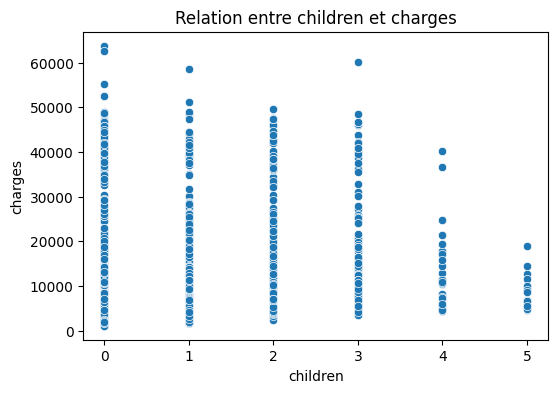

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['age', 'bmi', 'children']  # Liste des features à analyser
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['charges'])
    plt.title(f"Relation entre {feature} et charges")
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.show()


# Détection des valeurs aberrantes

* Visuellement

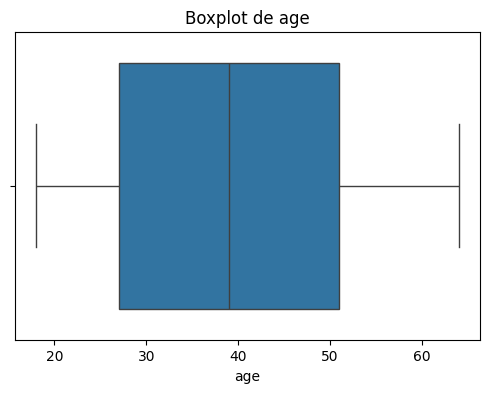

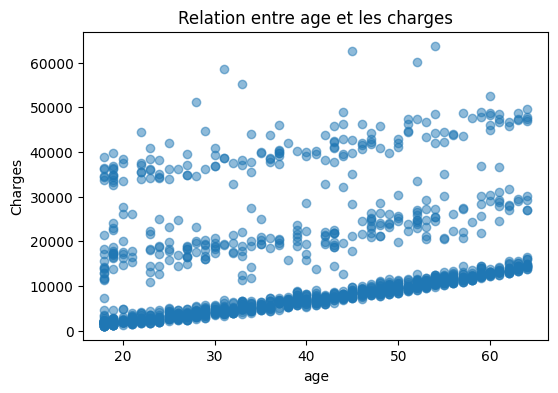

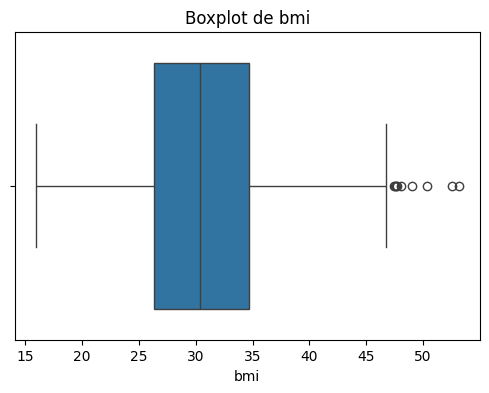

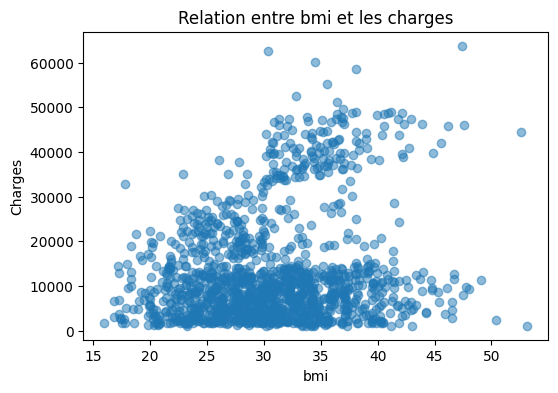

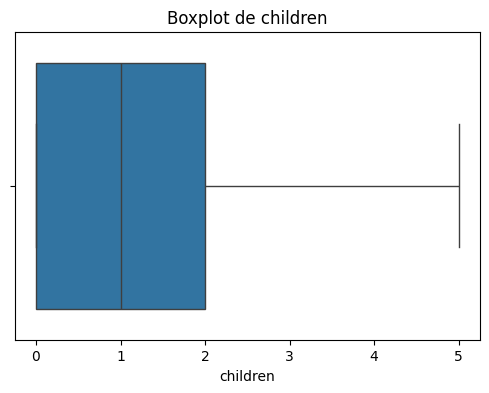

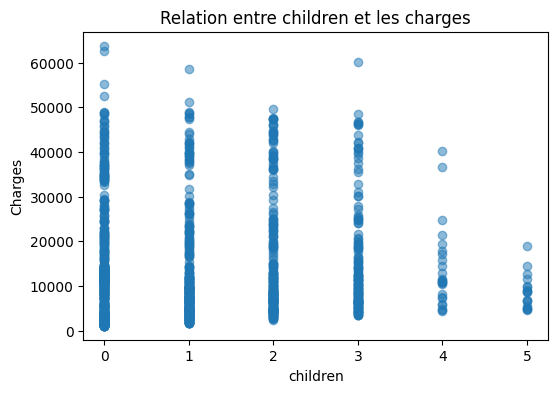

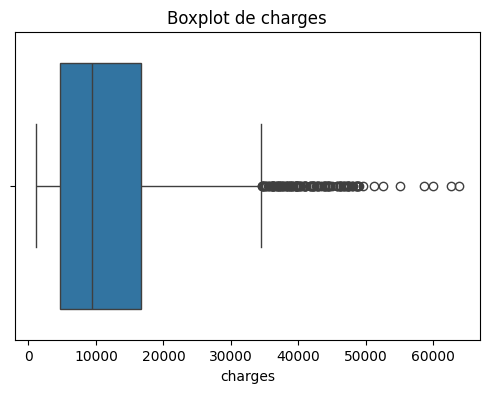

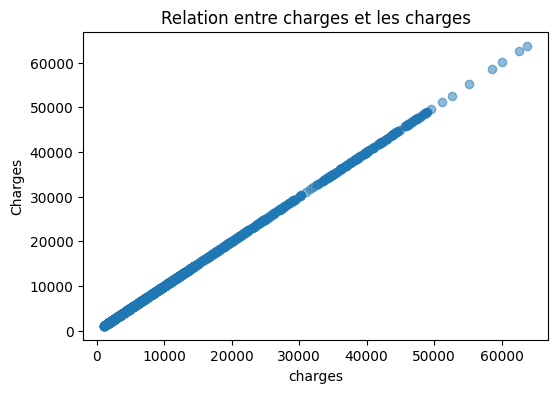

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner les colonnes numériques
selected_columns = df.select_dtypes(include=[np.number]).columns

# Boucle pour chaque colonne numérique
for col in selected_columns:
    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

    # Nuage de points pour la relation avec 'charges'
    plt.figure(figsize=(6, 4))
    plt.scatter(x=df[col], y=df['charges'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Charges")
    plt.title(f"Relation entre {col} et les charges")
    plt.show()


In [ ]:
#méthode 1
upper_lim=df['charges'].quantile(0.95)
#5% des valeurs les plus élevées de la colonne charges sont considérées comme potentiellement aberrantes.
df_outliers=df[df['charges']>upper_lim]
#Les valeurs aberrantes :
df_outliers

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
39,60,male,39.900,0,yes,southwest,48173.36100
55,58,male,36.955,2,yes,northwest,47496.49445
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
1284,61,male,36.300,1,yes,southwest,47403.88000
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325


# Détection les valeurs aberrantes en utilisant z-score

In [ ]:
def detect_outliers(data):
  outliers=[]
  threshold=3
  mean=np.mean(data)
  std=np.std(data)
  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)

  return outliers

In [ ]:
  print(f"La listes des outliers dans : charges{detect_outliers(df['charges'])}")
  print(f"La listes des outliers dans : bmi{detect_outliers(df['bmi'])}")

La listes des outliers dans : charges[51194.55914, 63770.42801, 58571.07448, 55135.40209, 52590.82939, 60021.39897, 62592.87309]
La listes des outliers dans : bmi[49.06, 50.38, 52.58, 53.13]


# Transformation logarithmique des valeurs aberrantes pour réduire leur effet

In [ ]:

print(f"La listes des outliers dans : charges{detect_outliers(df['charges'])}")
print(f"La listes des outliers dans : bmi{detect_outliers(df['bmi'])}")
df['charges']=np.log1p(df['charges'])
df['bmi']=np.log1p(df['bmi'])
df['charges']

from scipy import stats
y_boxcox, lambda_ = stats.boxcox(df['bmi'])  # Transformation Box-Cox


La listes des outliers dans : charges[51194.55914, 63770.42801, 58571.07448, 55135.40209, 52590.82939, 60021.39897, 62592.87309]
La listes des outliers dans : bmi[49.06, 50.38, 52.58, 53.13]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print (X.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% for training, 20% for testing
model=DecisionTreeRegressor(max_depth=4, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2}")

ValueError: could not convert string to float: 'female'

In [ ]:
from sklearn.tree import plot_tree

# Visualizing decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()
